# LA IDEA DE ESTE ANÁLISIS ES SABER LA TENDENCIA DE LAS ACCIONES A  ESTUDIAR

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit,least_squares
import yfinance
import pandas as pd
import seaborn as sb
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Obtenemos el ticker de Grifols S.A. encontrado en yfinance
grifols_ticker = yfinance.Ticker("GRF.MC")

# Obtenemos los datos históricos de los últimos 5 años
history = grifols_ticker.history(period = "5y")

print("El dataset tiene {} filas.".format(history.shape[0]))
history.head()

El dataset tiene 1278 filas.


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-02-12,16.928927,17.008625,16.736713,16.877357,1200536,0.0,0
2016-02-15,17.228971,17.594646,17.116454,17.594646,1309863,0.0,0
2016-02-16,17.754042,17.772795,17.393054,17.444624,963142,0.0,0
2016-02-17,17.496197,17.950949,17.468067,17.950949,992893,0.0,0
2016-02-18,18.072837,18.227547,17.880623,18.096277,934752,0.0,0


In [4]:
history.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-02-05,23.700001,23.959999,23.610001,23.620001,617528,0.0,0
2021-02-08,23.670000,23.840000,23.200001,23.309999,720269,0.0,0
2021-02-09,23.410000,23.590000,23.200001,23.350000,611551,0.0,0
2021-02-10,23.410000,23.430000,23.010000,23.040001,837658,0.0,0
2021-02-11,23.049999,23.250000,22.709999,22.809999,438490,0.0,0


In [5]:
#Seleccionamos los valores de las acciones con los que se cierra el mercado
df=history
df_close=df.iloc[:,3]
df_close.head()

Date
2016-02-11    16.905491
2016-02-12    16.877357
2016-02-15    17.594646
2016-02-16    17.444624
2016-02-17    17.950949
Name: Close, dtype: float64

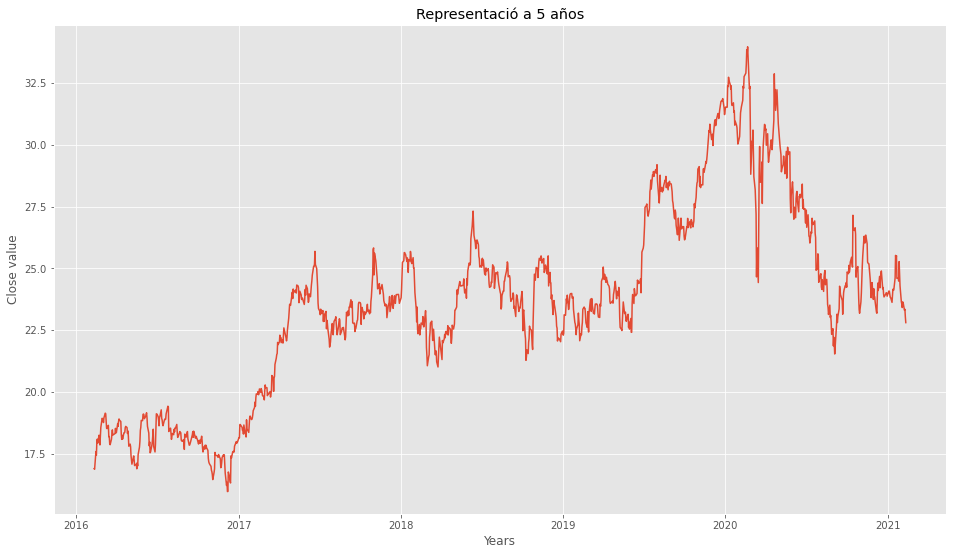

In [6]:
#Previsualizamos que forma tienen los valores de cierre de las acciones a lo largo del tiempo
plt.plot(df_close)
plt.title("Representació a 5 años")
plt.xlabel("Years")
plt.ylabel("Close value")
plt.show()

In [7]:
#Podemos observar algunos estadisticos del dataset para cada columna
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1278.000000,1278.000000,1278.000000,1278.000000,1.278000e+03,1278.000000,1278.0
mean,23.670141,23.915976,23.393244,23.654488,1.023301e+06,0.001204,0.0
std,3.799082,3.850304,3.709429,3.778548,8.091848e+05,0.014479,0.0
min,15.951284,16.080000,15.712920,15.975119,0.000000e+00,0.000000,0.0
25%,21.949607,22.216732,21.623432,21.974634,6.050752e+05,0.000000,0.0
50%,23.729997,23.954916,23.497674,23.720958,8.214000e+05,0.000000,0.0
75%,25.391504,25.687765,25.133110,25.403673,1.163196e+06,0.000000,0.0
max,33.880368,34.089018,33.641916,33.969788,1.052590e+07,0.203996,0.0


In [8]:
#Creamos una lista del 1 al 1278 que representan los días de mercado que tenemos registrados en el data set
x=[]
num = int(1278)
numbers=0
for n in range(num):
    numbers =numbers +1
    x.append(numbers)

In [9]:
#Añadimos los días al data set, trabajar con días que a fin de cuentas son números normales facilita las cosas
df["Dias"]=x
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Dias
Date,,,,,,,,
2016-02-11,17.266479,17.266479,16.755470,16.905491,1488238,0.0,0,1
2016-02-12,16.928927,17.008625,16.736713,16.877357,1200536,0.0,0,2
2016-02-15,17.228971,17.594646,17.116454,17.594646,1309863,0.0,0,3
2016-02-16,17.754042,17.772795,17.393054,17.444624,963142,0.0,0,4
2016-02-17,17.496197,17.950949,17.468067,17.950949,992893,0.0,0,5


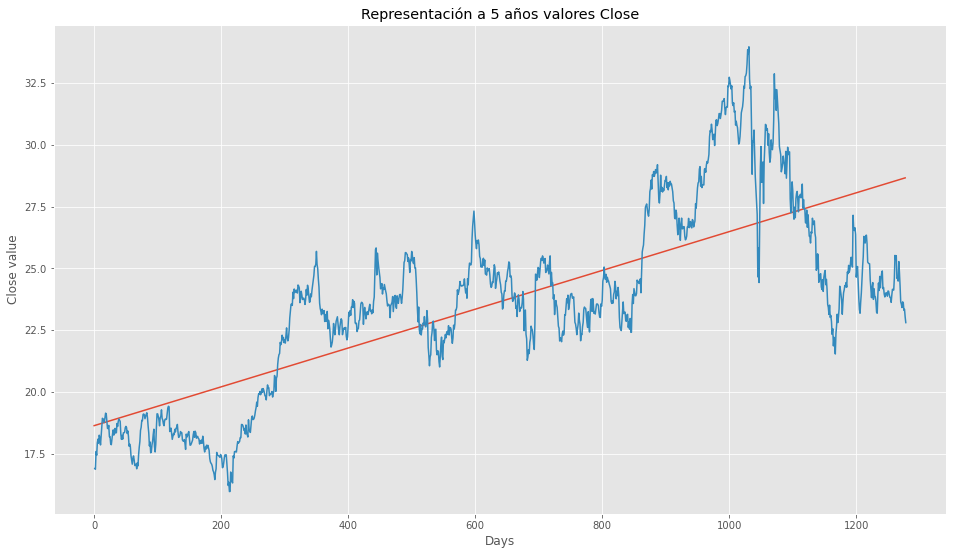

In [10]:
#Preparamos los datos para predecir en que tendencia evoluciona el valor de las acciones.
Y=df.iloc[:,3]
X=df.iloc[:,7]

Y=Y.values.reshape(-1,1)
X=X.values.reshape(-1,1)

#Linea de tendencia a 5 años vista

from sklearn.linear_model import LinearRegression

regressor = linear_model.LinearRegression()
regressor.fit(X,Y)

y_pred = regressor.predict(X)

plt.plot(y_pred)
plt.title("Representación a 5 años valores Close")
plt.xlabel("Days")
plt.ylabel("Close value")
plt.plot(X,Y)
plt.show()

### HAY QUE TENER EN CUENTA QUE EL DATASET SE ACTUALIZA Y TIENE 1278 DÍAS REGISTRADOS HASTA LA FECHA ACTUAL EN LA QUE  SE HACE CORRER EL APLICATIVO


Tiempo a revisar en días:  7


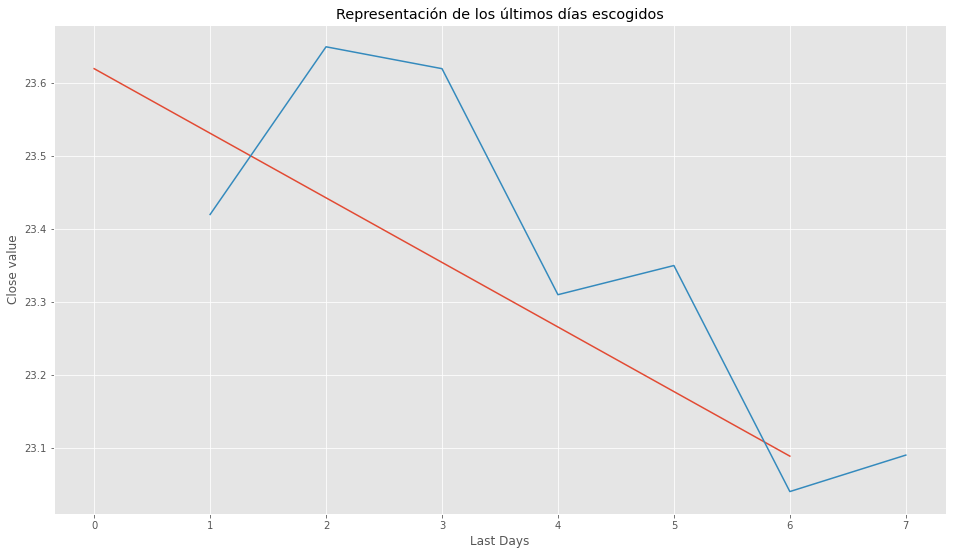

In [26]:
#Elegimos que últimos días queremos estudiar para hacer nuestras previsiones en la linea de tendencia 
day=int(input("Tiempo a revisar en días:  "))
Yf=df.iloc[(1278-day):1278]
Yfc=Yf.iloc[:,3]
Xf=df.iloc[0:(day)]
Xfc=Xf.iloc[:,7]

Yfc=Yfc.values.reshape(-1,1)
Xfc=Xfc.values.reshape(-1,1)

from sklearn.linear_model import LinearRegression

regressor = linear_model.LinearRegression()
regressor.fit(Xfc,Yfc)

y_pred = regressor.predict(Xfc)

plt.plot(y_pred)
plt.title("Representación de los últimos días escogidos")
plt.xlabel("Last Days")
plt.ylabel("Close value")
plt.plot(Xfc,Yfc)
plt.show()

In [27]:
#Calculamos la pendiente de la linea de tendencia para saber el grado en que desciende el valor
def pendiente(a1,b1,a2,b2):
    m =float((b2-b1)/(a2-a1))
    print('La pendiente de la recta es %5.2f' %m)
    
#Valor inicial   
Ypi=Yf.iloc[0]
Ypif=Ypi["Close"]

#valor final
Ypf=Yf.iloc[-1]
Ypff=Ypf["Close"]

pendiente(1,Ypif,day,Ypff)

La pendiente de la recta es -0.05


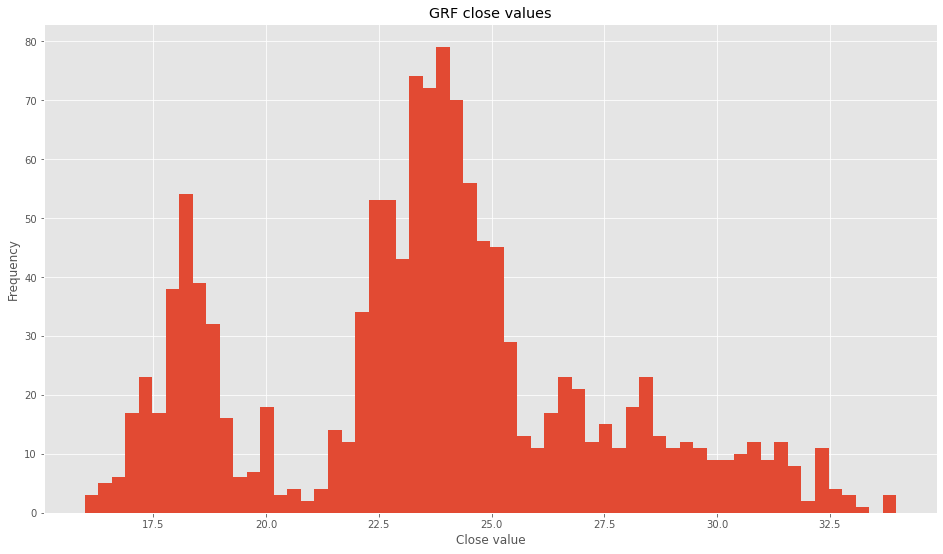

<Figure size 1152x648 with 0 Axes>

In [20]:
# Histograma 
plt.title('GRF close values')
plt.hist(df_close, bins = 60)
plt.grid(True)
plt.xlabel("Close value")
plt.ylabel("Frequency")
plt.show()
plt.clf()

{'whiskers': [<matplotlib.lines.Line2D at 0x250c2777160>,
 'caps': [<matplotlib.lines.Line2D at 0x250c2777e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x250bc794e20>],
 'medians': [<matplotlib.lines.Line2D at 0x250c27643d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x250c2764a00>],
 'means': []}

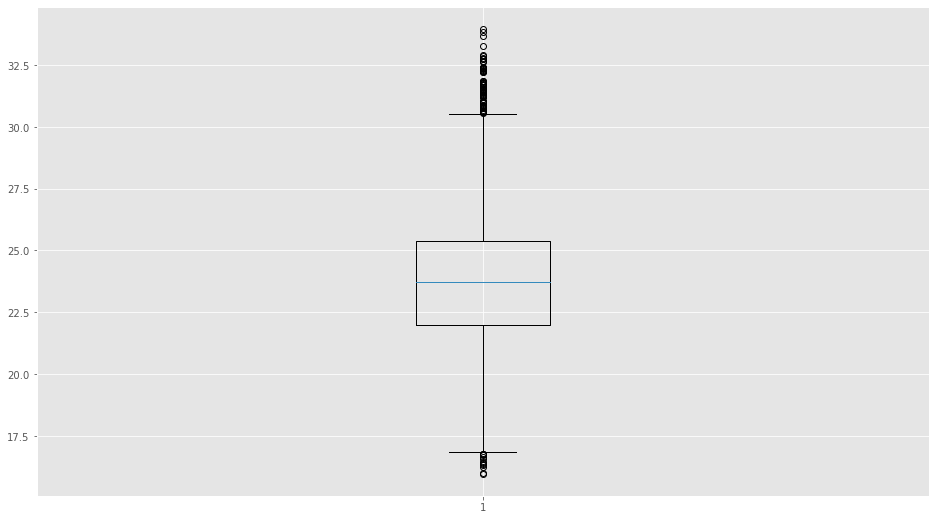

In [19]:
plt.boxplot(df_close) 